Mikail Crito Husada

In [16]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [18]:
def dataset(dataset, time_step=1):
  X = []
  Y = []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    X.append(a)
    Y.append(dataset[i+time_step, 0])
  return np.array(X), np.array(Y)

read Dataset

In [4]:
df = pd.read_csv('Delhi_Weather.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61935,20041115-00:00,Mist,9.0,0,0,NaN,71.0,NaN,1015.0,0,0,13.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
61936,20041115-03:00,Haze,9.0,0,0,NaN,49.0,NaN,1017.0,0,0,16.0,0,0,2.0,270.0,West,NaN,NaN,5.6
61937,20041115-06:00,Haze,9.0,0,0,NaN,28.0,NaN,1016.0,0,0,24.0,0,0,2.0,270.0,West,NaN,NaN,9.3
61938,20041115-09:00,Haze,10.0,0,0,NaN,22.0,NaN,1013.0,0,0,28.0,0,0,2.0,320.0,NW,NaN,NaN,5.6


Pengecekan data yang null

In [6]:
df.isnull().sum()

datetime_utc        0
 _conds             1
 _dewptm          571
 _fog               0
 _hail              0
 _heatindexm    35454
 _hum             605
 _precipm       61940
 _pressurem         7
 _rain              0
 _snow              0
 _tempm           544
 _thunder           0
 _tornado           0
 _vism           4341
 _wdird           503
 _wdire           503
 _wgustm        60925
 _windchillm    61370
 _wspdm          2305
dtype: int64

In [7]:
df1 = df[["datetime_utc"," _tempm"]]

In [8]:
df1.columns = ["date", "temp"]

In [9]:
df1.isnull().sum()

date      0
temp    544
dtype: int64

In [10]:
df1.dropna(inplace = True)

<ipython-input-10-f74963dda761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [11]:
df1["date"] = pd.to_datetime(df1["date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61396 entries, 0 to 61939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    61396 non-null  datetime64[ns]
 1   temp    61396 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


<ipython-input-11-c91336528aa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date"] = pd.to_datetime(df1["date"])


In [12]:
df1=df1.set_index('date')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data1 = scaler.fit_transform(df1)

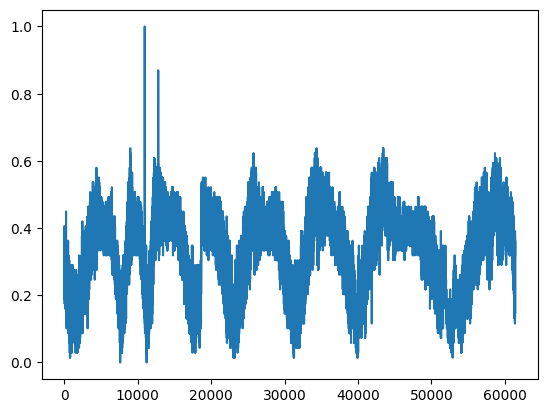

In [14]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [15]:
train_size = int(len(data1)*0.8)
test_size = len(data1) - train_size
xdata, ydata = data1[0: train_size, :], data1[train_size: len(data1), :1]
train_size, test_size


(49116, 12280)

In [21]:
x_train, y_train = dataset(xdata, 100)
x_test, y_test = dataset(ydata, 100)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout

In [24]:
model = Sequential([
    LSTM(64, return_sequences = True, input_shape=(100,1)),
    Dropout(0.1),
    LSTM(64, return_sequences = True),
    Dropout(0.1),
    Bidirectional(LSTM(64)),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(1)
])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
autostop_learn = EarlyStopping(
    monitor = 'loss',
    min_delta = 0,
    patience = 2,
    verbose = 1,
    mode = 'auto'
)

Train Model

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=30,
    batch_size = 130,
    callbacks = autostop_learn,
    verbose = 2
)

Epoch 1/30
378/378 - 322s - loss: 0.0398 - mae: 0.2504 - val_loss: 0.0146 - val_mae: 0.1417 - 322s/epoch - 853ms/step
Epoch 2/30
378/378 - 299s - loss: 0.0104 - mae: 0.1242 - val_loss: 0.0086 - val_mae: 0.1111 - 299s/epoch - 790ms/step
Epoch 3/30
378/378 - 300s - loss: 0.0075 - mae: 0.1030 - val_loss: 0.0084 - val_mae: 0.1094 - 300s/epoch - 795ms/step
Epoch 4/30
378/378 - 280s - loss: 0.0072 - mae: 0.0992 - val_loss: 0.0084 - val_mae: 0.1091 - 280s/epoch - 740ms/step
Epoch 5/30
378/378 - 296s - loss: 0.0072 - mae: 0.0981 - val_loss: 0.0084 - val_mae: 0.1087 - 296s/epoch - 782ms/step
Epoch 6/30
378/378 - 295s - loss: 0.0071 - mae: 0.0974 - val_loss: 0.0083 - val_mae: 0.1083 - 295s/epoch - 781ms/step
Epoch 7/30
378/378 - 295s - loss: 0.0070 - mae: 0.0969 - val_loss: 0.0083 - val_mae: 0.1079 - 295s/epoch - 781ms/step
Epoch 8/30
378/378 - 294s - loss: 0.0070 - mae: 0.0965 - val_loss: 0.0082 - val_mae: 0.1075 - 294s/epoch - 778ms/step
Epoch 9/30
378/378 - 296s - loss: 0.0069 - mae: 0.0961 -

Grafik

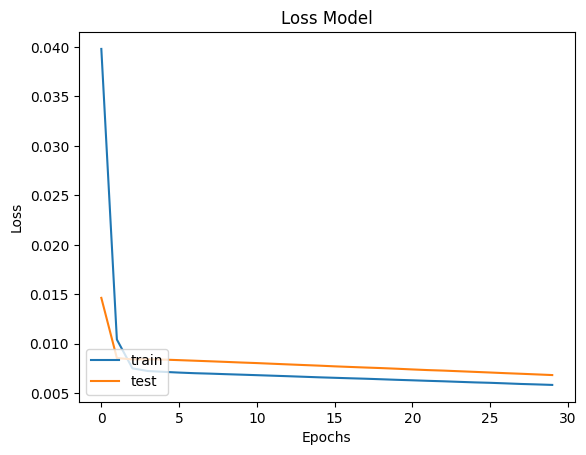

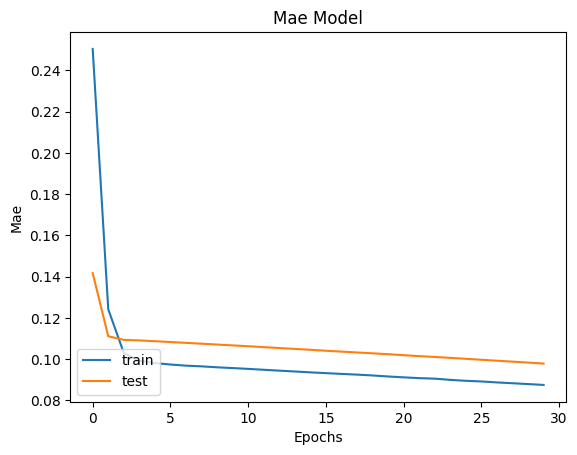

In [29]:
#loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'lower left')
plt.show()

#Mae Model
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mae Model')
plt.ylabel('Mae')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'lower left')
plt.show()